# Steps
<b>Objective</b>: predict benefits of Healthcare for All obtains through mail donations by “lapsed” doners 
<br><b>Gather data</b>: data spread across several files that need to be merged 
<br><b>Clean data</b>: empty cells, weird entries, gender encoding 
<br><b>Explore</b>: answer questions like: group donors (by gender, by state), what’s the distribution by group, are there noticeable group differences? 
<br><b>Process</b>: Look at what model to apply (might need to change how some columns are expressed) 
<br><b>Training</b>: create model to predict donation amount of each doner 
<br><b>Validate</b>: check predictions against a little subset of the data 
<br><b>Present</b>: show findings

In [26]:
# Import libraries for the dependencies
import numpy as np # library for numerical analysis, good for arrays
import pandas as pd  # library for data analysis (tabular data) based on numpy
import matplotlib.pyplot as plt # library for plotting 
%matplotlib inline 
# magic command to display plots in the notebook
import seaborn as sns # library for plotting based on matplotlib

## 1. Gather data

In [27]:
df = pd.read_csv('file1.csv') # read the csv file 
# pd.read_csv('file2.txt', sep='\t') # read the txt file
df2 = pd.read_csv('file2.csv') # read the csv file

In [28]:
display(df.head()) # display the first 5 rows
#display(df.tail()) # display the last 5 rows
print(df.shape) # number of rows and columns
#df.columns # column names
#len(df.columns) # number of columns
df.info() # information about the dataframe
df.columns == df2.columns # check if the columns are the same in both dataframes 
#df.loc[:,["gender","id"]] # show columns by name
#df.iloc[:,[2,0]] # show columns by index
df["GENDER"].value_counts(dropna=False) # count the number of values in a column (NaN values are included)

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


(4008, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4008 entries, 0 to 4007
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer                   1071 non-null   object 
 1   ST                         1071 non-null   object 
 2   GENDER                     954 non-null    object 
 3   Education                  1071 non-null   object 
 4   Customer Lifetime Value    1068 non-null   object 
 5   Income                     1071 non-null   float64
 6   Monthly Premium Auto       1071 non-null   float64
 7   Number of Open Complaints  1071 non-null   object 
 8   Policy Type                1071 non-null   object 
 9   Vehicle Class              1071 non-null   object 
 10  Total Claim Amount         1071 non-null   float64
dtypes: float64(3), object(8)
memory usage: 344.6+ KB


NaN       3054
F          457
M          413
Male        39
female      28
Femal       17
Name: GENDER, dtype: int64

## 2. Clean data

### Standardize columns 

In [52]:
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_') # convert column names to lower case, strip spaces & replace spaces with underscores
#df[['state','id']] # show columns by name or reorder columns
df = df.reindex(sorted(df.columns), axis=1) # reorder columns by alphabetical order 
df = df.rename(columns={'id':'ID'}) # rename a column 
df.columns

Index(['customer', 'customer_lifetime_value', 'education', 'gender', 'income',
       'monthly_premium_auto', 'number_of_open_complaints', 'policy_type',
       'st', 'total_claim_amount', 'vehicle_class'],
      dtype='object')

### Merge data 

In [38]:
#df3 = pd.merge(df, df2, on='id') # merge the two dataframes on the column 'id'
df3 = pd.concat([df, df2], axis=1) # concatenate the two dataframes on the columns (axis=1)

### Add new columns, filter rows, reset index

In [39]:
df3 = df3.reset_index(drop=False) # reset the indexes to avoid 2 rows with the same index. Drop=False to keep the old index as a column 
#df3['new column'] = df3['column1'] + df3['column2'] # create a new column by adding two columns 
#df3[(df3['target_d']==100) & (df3['very_generous'] == True) ] # filter rows by multiple conditions (AND = "&", OR = "|", NOT = ~, IN = isin)
#df3.T # transpose the dataframe 

### Fix typos, convert to correct data type, deal with empty values

In [40]:
df.head()

,customer,customer_lifetime_value,education,gender,income,monthly_premium_auto,number_of_open_complaints,policy_type,st,total_claim_amount,vehicle_class
0,RB50392,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Washington,2.704934,Four-Door Car
1,QZ44356,697953.59%,Bachelor,F,0.0,94.0,1/0/00,Personal Auto,Arizona,1131.464935,Four-Door Car
2,AI49188,1288743.17%,Bachelor,F,48767.0,108.0,1/0/00,Personal Auto,Nevada,566.472247,Two-Door Car
3,WW63253,764586.18%,Bachelor,M,0.0,106.0,1/0/00,Corporate Auto,California,529.881344,SUV
4,GA49547,536307.65%,High School or Below,M,36357.0,68.0,1/0/00,Personal Auto,Washington,17.269323,Four-Door Car


In [46]:
# clean values with typos (remove the "A" and convert to float)
#def clean_values(x):
#    x = str(x)
#    if ('A' in x ):
#        x = x.replace('A','')
#    x = float(x)
#    return x 
#df3['customer'] = df3['customer'].apply(clean_values) # apply the function to the column
#lambda x: float(x.replace("A","")) # same as above but using lambda function (quick and dirty and anonymous function)
df3['income'] = df3['income'].astype(str).map(lambda x: float(x.replace("A",""))) # apply the anon def directly to the column
df3['monthly_premium_auto'] =  pd.to_numeric(df3['monthly_premium_auto'], errors='coerce') # convert column to float and replace NaN values with 0
df3['number_of_open_complaints'] =  pd.to_datetime(df3['number_of_open_complaints'], errors='coerce') # convert column to datetime and replace NaN values with 0
display(df3.head())
df3.isna().sum() # count the number of NaN values in each column 

,index,customer,customer_lifetime_value,education,gender,income,monthly_premium_auto,number_of_open_complaints,policy_type,st,...,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Total Claim Amount,Policy Type,Vehicle Class
0,0,RB50392,NaN,Master,NaN,0.0,1000.0,NaT,Personal Auto,Washington,...,Arizona,F,Bachelor,323912.47%,16061.0,88.0,1/0/00,633.6,Personal Auto,Four-Door Car
1,1,QZ44356,697953.59%,Bachelor,F,0.0,94.0,NaT,Personal Auto,Arizona,...,California,F,Master,462680.11%,79487.0,114.0,1/0/00,547.2,Special Auto,SUV
2,2,AI49188,1288743.17%,Bachelor,F,48767.0,108.0,NaT,Personal Auto,Nevada,...,California,F,College,899704.02%,54230.0,112.0,1/0/00,537.6,Personal Auto,Two-Door Car
3,3,WW63253,764586.18%,Bachelor,M,0.0,106.0,NaT,Corporate Auto,California,...,Oregon,F,College,2580706.30%,71210.0,214.0,1/1/00,1027.2,Personal Auto,Luxury Car
4,4,GA49547,536307.65%,High School or Below,M,36357.0,68.0,NaT,Personal Auto,Washington,...,Arizona,F,College,380812.21%,94903.0,94.0,1/0/00,451.2,Corporate Auto,Two-Door Car


index                           0
customer                     2937
customer_lifetime_value      2940
education                    2937
gender                       3054
income                       2937
monthly_premium_auto         2937
number_of_open_complaints    3767
policy_type                  2937
st                           2937
total_claim_amount           2937
vehicle_class                2937
Customer                     3012
ST                           3012
GENDER                       3017
Education                    3012
Customer Lifetime Value      3016
Income                       3012
Monthly Premium Auto         3012
Number of Open Complaints    3012
Total Claim Amount           3012
Policy Type                  3012
Vehicle Class                3012
dtype: int64

### Remove duplicates

In [48]:
df3 = df3.drop_duplicates() # remove all duplicates 
df3 = df3.drop_duplicates(subset=['GENDER','Vehicle Class']) # remove duplicates based on two columns 
df3 = df3.dropna() # drop rows with NaN values


### Save clean data 

In [49]:
df3copy = df3.copy() # create a copy of the dataframe (useful for not losing the original dataframe) 
df3.to_csv('file3.csv', index=False) # index=False to not save the index as a column


## 3. Explore

### Drop missing values
This approach is acceptable when we don't know what could be the value of the NA & we are not going to drop a lot of rows (we don't want to end up with a tiny dataframe!).

In [51]:
null_df = pd.DataFrame(round(df3.isna().sum()/len(df3),4)*100) # count the number of NaN values in each column and convert to percentage
null_df = null_df.rename(columns = {'index': 'header_name', 0:'percent_nulls'}) # add a column showing null percentages per column 
columns_drop = null_df[null_df['percent_nulls'] > 90] # get columns with more than 90% of null values 
df3 = df3.drop(columns_drop.index, axis=1) # drop columns with more than 90% of null values
display(df3.head())

,index,customer,customer_lifetime_value,education,gender,income,monthly_premium_auto,number_of_open_complaints,policy_type,st,...,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Total Claim Amount,Policy Type,Vehicle Class
244,244,PP40919,237653.35%,College,Femal,0.0,91.0,2000-01-05,Personal Auto,Cali,...,Oregon,M,High School or Below,2634608.58%,48268.0,223.0,1/0/00,1605.6,Personal Auto,Luxury SUV


### Replace missing values
Sometimes, we can replace the missing values by a "reasonable guess". This "guess" can be determined by the domain knowledge (we already know their source and we know what's the value) 

In [ ]:
df3['column'] = df3['column'].fillna(df3['column'].mean()) # replace NaN values with the mean of the column (average)
df3['column'] = df3['column'].fillna(df3['column'].median()) # replace NaN values with the median of the column (middle value)
df3['column'] = df3['column'].fillna(df3['column'].mode()[0]) # replace NaN values with the mode of the column (most frequent value)

### Statistical check (dispersion)

In [ ]:
df3['column'].min() # min & max dispersion 
df3['column'].std() # standard deviation (how spread out the values are) 
df3['column'].var() # variance (how spread out the values are, but the values are squared, the higher the variance, the higher the standard deviation) 
df3['column'].quantile([0.25,0.5,0.75]) # quartiles (25%, 50%, 75%) 
df3['column'].describe() # summary statistics (count, mean, std, min, 25%, 50%, 75%, max) 

### Plot the data 

In [ ]:
import warnings
warnings.filterwarnings('ignore') # ignore warnings for cleaner output 

In [53]:
heights = [185,180,186,174,174,176,170,160,180,183,180,175,
         171,180,167,172,178,164,160,167,202]
shoe_size = [42,42,43,38,42,43,40,35,45,41,42,42,41,45,39,39,43,38,37,40,46]

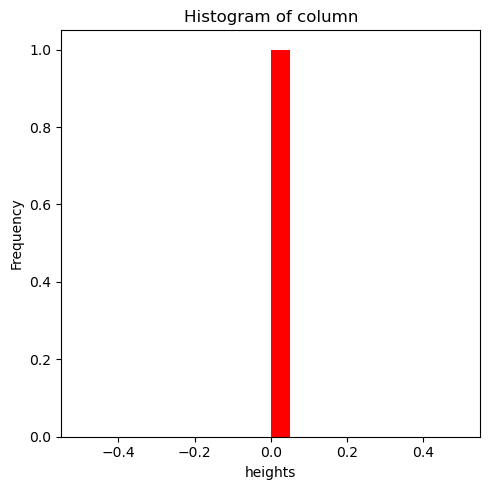

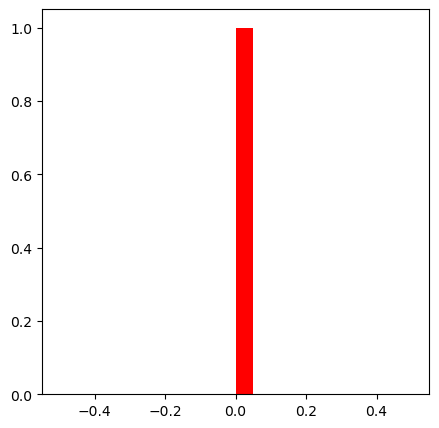

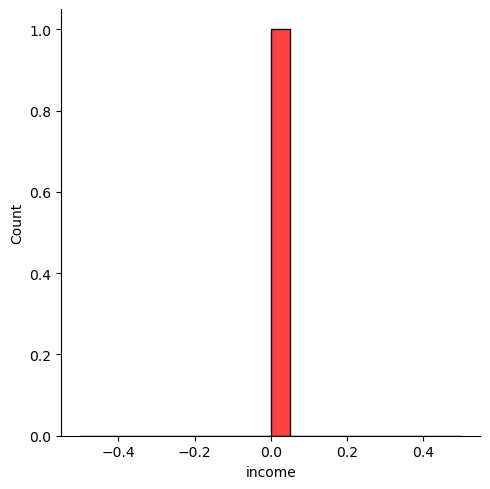

In [63]:
# plot a histogram 
df3['income'].plot(kind='hist', bins=20, figsize=(5,5), color='red')
plt.title('Histogram of column') 
plt.xlabel('heights') 
plt.ylabel('Frequency') 
plt.tight_layout() # adjust the layout to avoid overlapping 
plt.show() 
# different approach 
fig, ax = plt.subplots(figsize=(5,5)) # create a figure and axes
ax.hist(df3['income'], bins=20, color='red') # plot a histogram using 
# using seaborn 
sns.displot(df3['income'], bins=20, kde=False, color='red') # plot a histogram 
plt.show() 
# interactive plot using plotly 
import plotly.express as px 
fig = px.histogram(df3, x='income', nbins=20, title='Histogram of column') 
fig.show() 

### Checking correlations

In [64]:
df3.corr(method='pearson') # correlation matrix (pearson, kendall, spearman) 
# pearson: linear correlation (default), kendall: non-linear correlation, spearman: non-linear correlation (monotonic relationship)

,index,income,monthly_premium_auto,total_claim_amount,Income,Monthly Premium Auto,Total Claim Amount
index,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monthly_premium_auto,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_claim_amount,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monthly Premium Auto,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Claim Amount,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
import scipy.stats as stats # import the stats module from scipy 
round(stats.pearsonr(df3['income'], df3['total_claim_amount'])[0],2) # gives the correlation coefficient and the p-value (correlation between two columns)

ValueError: x and y must have length at least 2.